#EDA - Exploratory Data Analysis

In [2]:
# from google.colab import drive
# drive.mount("/content/drive")

In [3]:
# !cp "/content/drive/MyDrive/flight-price-prediction.zip" "/content/"

In [4]:
# !unzip *.zip && rm -rf *.zip

In [5]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

plt.style.use("fivethirtyeight")
warnings.filterwarnings("ignore")

In [6]:
economy = pd.read_csv("economy.csv")

In [7]:
economy.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953"
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953"
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956"
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955"
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955"


In [8]:
economy['year'] = pd.DatetimeIndex(economy['date']).year

In [9]:
economy['month'] = pd.DatetimeIndex(economy['date']).month

In [10]:
economy.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,year,month
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953",2022,11
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953",2022,11
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956",2022,11
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955",2022,11
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955",2022,11


In [11]:
economy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206774 entries, 0 to 206773
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        206774 non-null  object
 1   airline     206774 non-null  object
 2   ch_code     206774 non-null  object
 3   num_code    206774 non-null  int64 
 4   dep_time    206774 non-null  object
 5   from        206774 non-null  object
 6   time_taken  206774 non-null  object
 7   stop        206774 non-null  object
 8   arr_time    206774 non-null  object
 9   to          206774 non-null  object
 10  price       206774 non-null  object
 11  year        206774 non-null  int64 
 12  month       206774 non-null  int64 
dtypes: int64(3), object(10)
memory usage: 20.5+ MB


In [12]:
economy.shape

(206774, 13)

In [13]:
economy.isnull().sum()

date          0
airline       0
ch_code       0
num_code      0
dep_time      0
from          0
time_taken    0
stop          0
arr_time      0
to            0
price         0
year          0
month         0
dtype: int64

In [14]:
economy.describe()

,num_code,year,month
count,206774.000000,206774.0,206774.000000
mean,1706.096714,2022.0,3.779648
std,2320.463721,0.0,2.745118
min,101.000000,2022.0,1.000000
25%,588.000000,2022.0,2.000000
50%,818.000000,2022.0,3.000000
75%,960.000000,2022.0,3.000000
max,9991.000000,2022.0,12.000000


Text(0, 0.5, 'Flights')

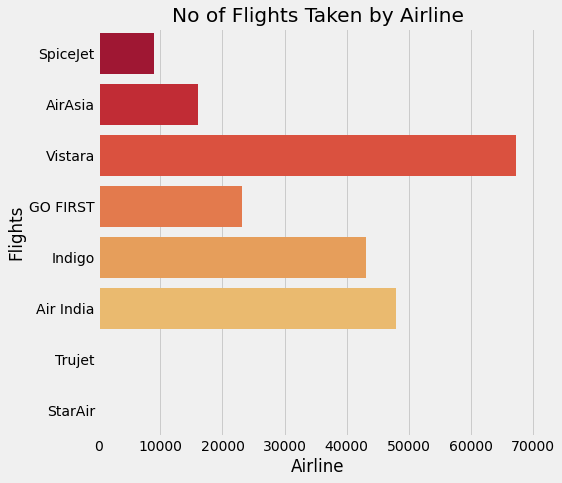

In [15]:
plt.figure(figsize=(7, 7))
sns.countplot(y="airline", data=economy, palette="YlOrRd_r")
plt.title("No of Flights Taken by Airline")
plt.xlabel("Airline")
plt.ylabel("Flights")

In [16]:
# as we can see that Vistara has taken most flights

Text(0, 0.5, 'Flights')

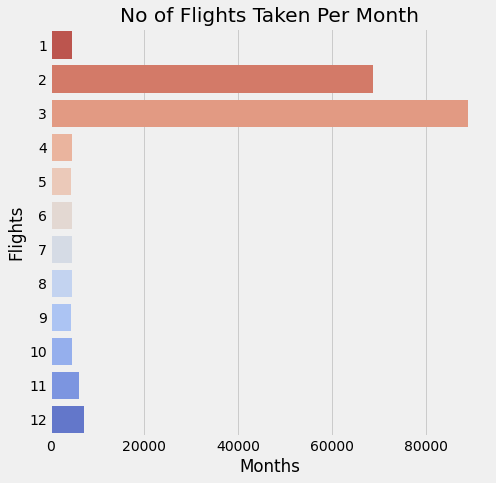

In [17]:
plt.figure(figsize=(7, 7))
sns.countplot(y="month", data=economy, palette="coolwarm_r")
plt.title("No of Flights Taken Per Month")
plt.xlabel("Months")
plt.ylabel("Flights")

In [18]:
# as we can see that in most flights taken in the March

Text(0, 0.5, 'Flights')

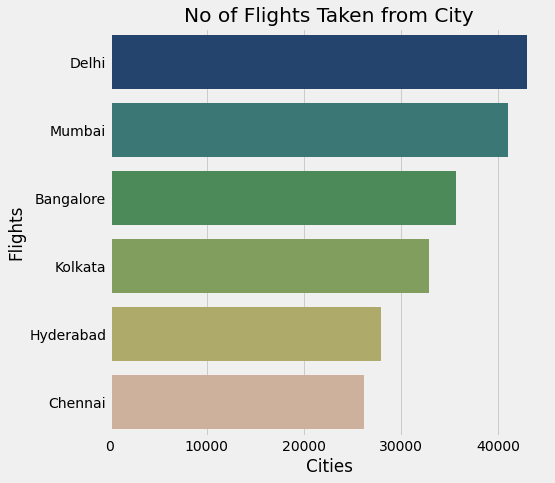

In [19]:
plt.figure(figsize=(7, 7))
sns.countplot(y="from", data=economy, palette="gist_earth")
plt.title("No of Flights Taken from City")
plt.xlabel("Cities")
plt.ylabel("Flights")

In [20]:
# as we can see that most flights are taken from Delhi

Text(0, 0.5, 'Flights')

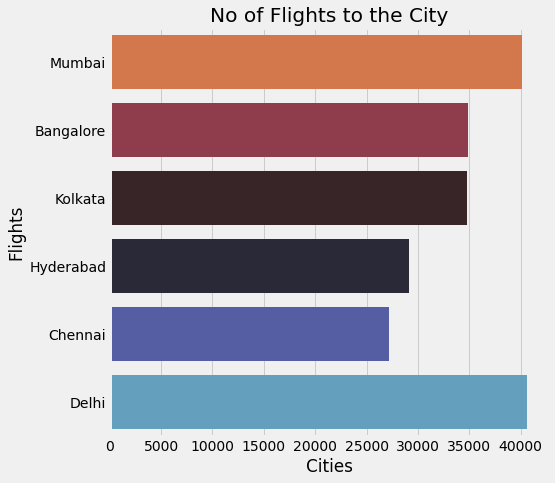

In [21]:
plt.figure(figsize=(7, 7))
sns.countplot(y="to", data=economy, palette="icefire_r")
plt.title("No of Flights to the City")
plt.xlabel("Cities")
plt.ylabel("Flights")

In [22]:
# as we can see that most of the flights are to the Delhi

**Bussiness**

In [23]:
buss = pd.read_csv("business.csv")

In [24]:
buss.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612"
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612"
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220"
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450"
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690"


In [25]:
buss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93487 entries, 0 to 93486
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        93487 non-null  object
 1   airline     93487 non-null  object
 2   ch_code     93487 non-null  object
 3   num_code    93487 non-null  int64 
 4   dep_time    93487 non-null  object
 5   from        93487 non-null  object
 6   time_taken  93487 non-null  object
 7   stop        93487 non-null  object
 8   arr_time    93487 non-null  object
 9   to          93487 non-null  object
 10  price       93487 non-null  object
dtypes: int64(1), object(10)
memory usage: 7.8+ MB


In [26]:
buss.shape

(93487, 11)

Text(0, 0.5, 'Flights')

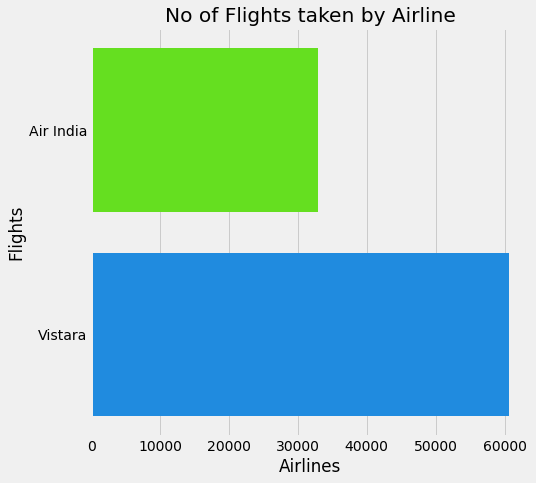

In [27]:
plt.figure(figsize=(7, 7))
sns.countplot(y="airline", data=buss, palette="gist_rainbow")
plt.title("No of Flights taken by Airline")
plt.xlabel("Airlines")
plt.ylabel("Flights")

In [28]:
# as we can see that most flights taken by Vistara

In [29]:
buss.isnull().sum()

date          0
airline       0
ch_code       0
num_code      0
dep_time      0
from          0
time_taken    0
stop          0
arr_time      0
to            0
price         0
dtype: int64

In [30]:
# cleaned dataset
data = pd.read_csv("Clean_Dataset.csv", index_col=0)

Exploraing

In [31]:
data.shape

(300153, 11)

In [32]:
data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [33]:
data.tail()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585
300152,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,81585


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 27.5+ MB


In [35]:
data.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [36]:
data.dtypes

airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
dtype: object

Text(0, 0.5, 'Flights')

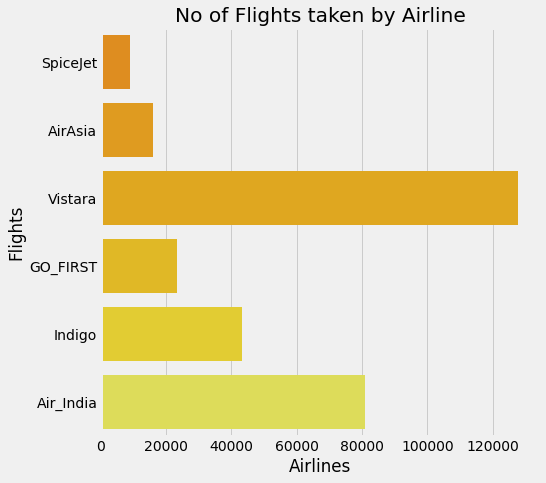

In [37]:
plt.figure(figsize=(7, 7))
sns.countplot(y="airline", data=data, palette="Wistia_r")
plt.title("No of Flights taken by Airline")
plt.xlabel("Airlines")
plt.ylabel("Flights")

In [38]:
print("Let's Explore features type:- ")
print("-----------------------------------------------")
print(f"Total no of Textual Columns are {len(list(data.select_dtypes(include=['category', 'object']).columns))}.")
print(f"Total no of Numerical Columns are {len(list(data.select_dtypes(include=['int64', 'float']).columns))}.")

Let's Explore features type:- 
-----------------------------------------------
Total no of Textual Columns are 8.
Total no of Numerical Columns are 3.


In [39]:
no_airlines = len(list(data['airline'].unique()))
no_destination_city = len(list(data['destination_city'].unique()))
no_source_city = len(list(data['source_city'].unique()))
print("** There are {} of different airlines.".format(no_airlines))
print("** There are {} destination cities and {} source cities.".format(no_destination_city, no_source_city))

** There are 6 of different airlines.
** There are 6 destination cities and 6 source cities.


In [40]:
data['duration_cat'] = pd.cut(data.duration, bins=[0,6,12,24,100], labels=['<6', '<12','<24', 'more than a day'])

In [41]:
data.sample(10)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,duration_cat
131681,Vistara,UK-708,Kolkata,Night,one,Morning,Mumbai,Economy,13.33,27,6711,<24
287546,Vistara,UK-878,Hyderabad,Afternoon,one,Morning,Chennai,Business,22.92,48,41314,<24
44568,GO_FIRST,G8-2440,Mumbai,Morning,one,Night,Delhi,Economy,11.33,10,25579,<12
4997,Air_India,AI-471,Delhi,Afternoon,one,Evening,Mumbai,Economy,4.58,26,4559,<6
97887,Air_India,AI-9517,Bangalore,Evening,one,Night,Mumbai,Economy,26.42,23,6506,more than a day
142771,Indigo,6E-566,Kolkata,Night,one,Early_Morning,Hyderabad,Economy,9.08,4,12527,<12
275441,Vistara,UK-876,Hyderabad,Night,one,Morning,Delhi,Business,11.00,15,51270,<12
105289,GO_FIRST,G8-241,Bangalore,Evening,one,Early_Morning,Kolkata,Economy,14.83,20,5177,<24
181407,Vistara,UK-828,Chennai,Early_Morning,one,Night,Delhi,Economy,13.67,10,12183,<24
88119,Vistara,UK-858,Bangalore,Early_Morning,one,Evening,Delhi,Economy,10.25,22,4111,<12


Airline vs Price

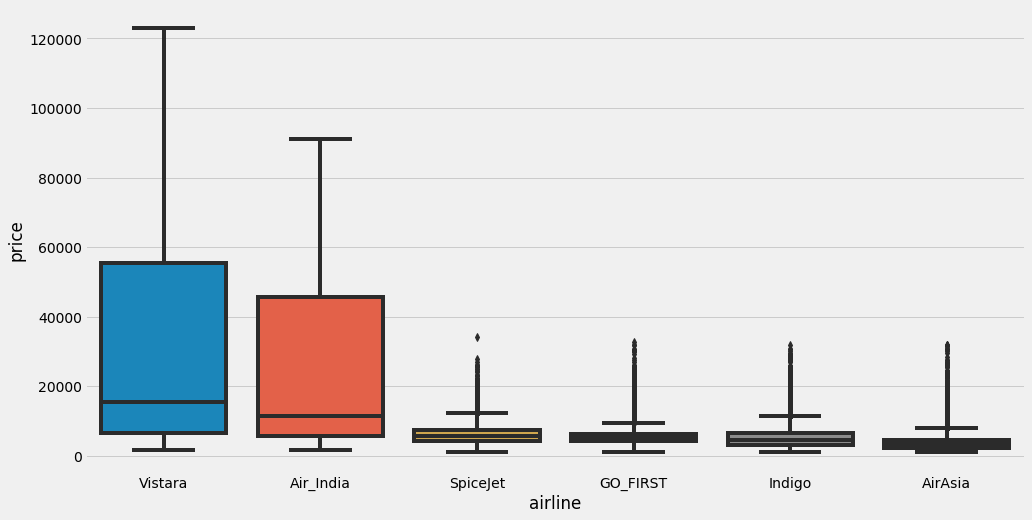

In [42]:
plt.figure(figsize=(15, 8))
sns.boxplot(x="airline", y="price", data=data.sort_values(by='price', ascending=False))

Source vs Price

In [43]:
data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,duration_cat
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,<6
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,<6
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,<6
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,<6
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,<6


In [44]:
data['source_city'].value_counts()

Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: source_city, dtype: int64

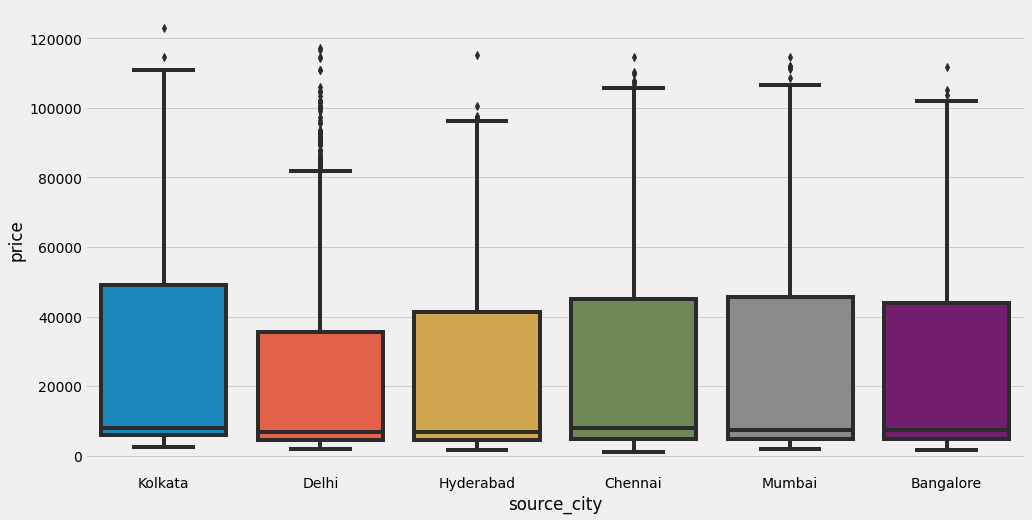

In [45]:
plt.figure(figsize=(15, 8))
sns.boxplot(x="source_city", y="price", data=data.sort_values(by='price', ascending=False))

<Figure size 1080x1080 with 0 Axes>

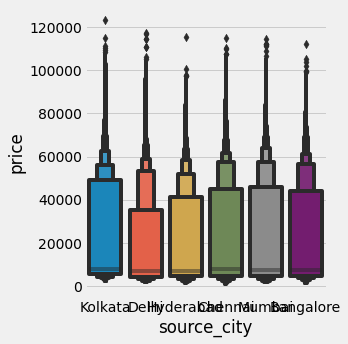

In [46]:
plt.figure(figsize=(15, 15))
sns.catplot(x="source_city", y="price", data=data.sort_values(by='price', ascending=False), kind="boxen")

<Figure size 1080x1080 with 0 Axes>

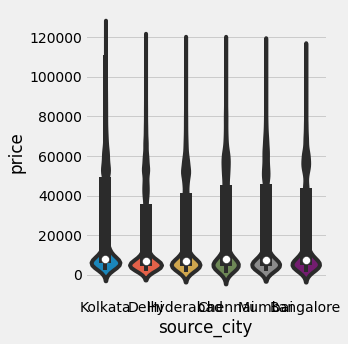

In [47]:
plt.figure(figsize=(15, 15))
sns.catplot(x="source_city", y="price", data=data.sort_values(by='price', ascending=False), kind="violin")

<Figure size 1080x1080 with 0 Axes>

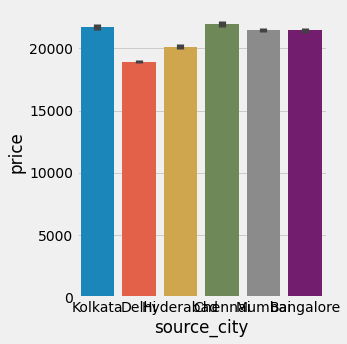

In [48]:
plt.figure(figsize=(15, 15))
sns.catplot(x="source_city", y="price", data=data.sort_values(by='price', ascending=False), kind="bar")

Destintaion vs Price

In [49]:
data['destination_city'].value_counts()

Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: destination_city, dtype: int64

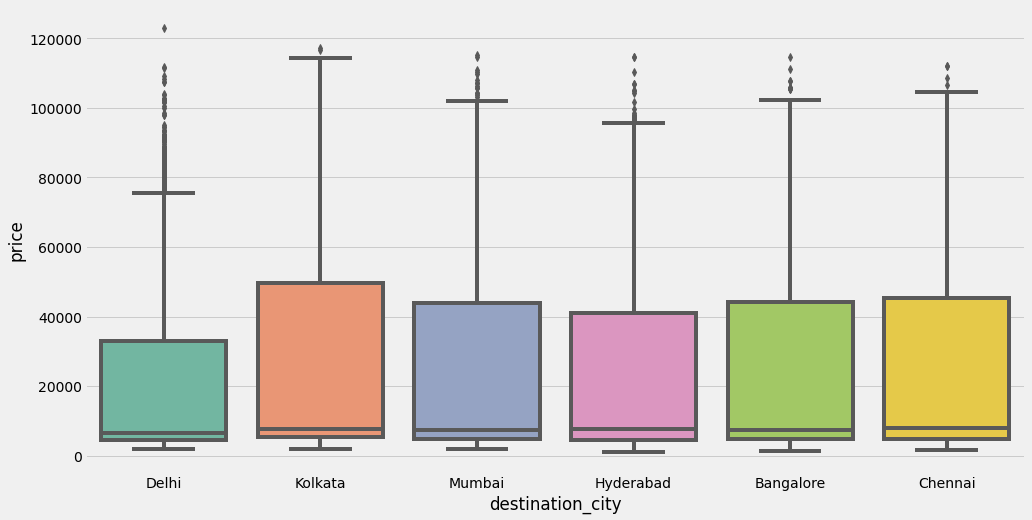

In [50]:
plt.figure(figsize=(15, 8))
sns.boxplot(x="destination_city", y="price", data=data.sort_values('price', ascending=False), palette="Set2")

Departure time vs Price

In [51]:
data['departure_time'].value_counts()

Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: departure_time, dtype: int64

Text(0, 0.5, 'Departure Times')

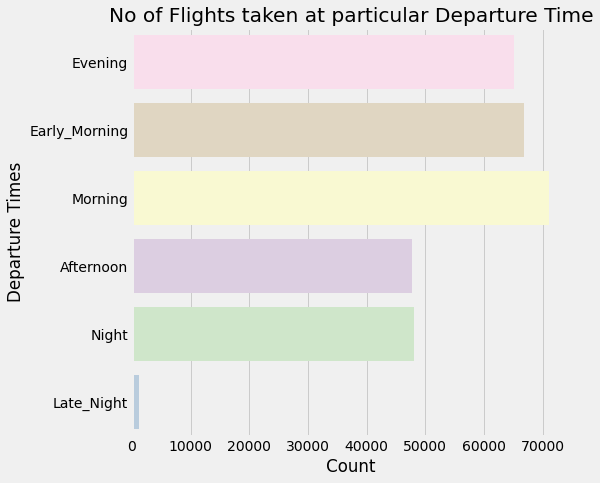

In [52]:
plt.figure(figsize=(7, 7))
sns.countplot(y="departure_time", data=data, palette="Pastel1_r")
plt.title("No of Flights taken at particular Departure Time")
plt.xlabel("Count")
plt.ylabel("Departure Times")

In [53]:
# as you can see that most of the flights departed at morning

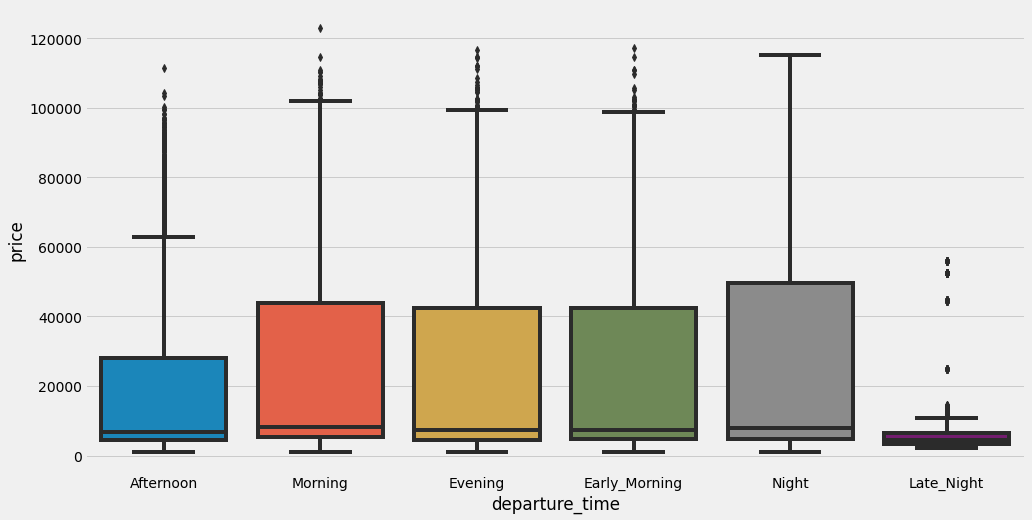

In [54]:
plt.figure(figsize=(15, 8))
sns.boxplot(x="departure_time", y="price", data=data.sort_values('price', ascending=True))

In [55]:
# as we can see that maximum price is of the flights that departed at Night

Arival Time vs Price

In [56]:
data['arrival_time'].value_counts()

Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: arrival_time, dtype: int64

Text(0, 0.5, 'Arrival Time')

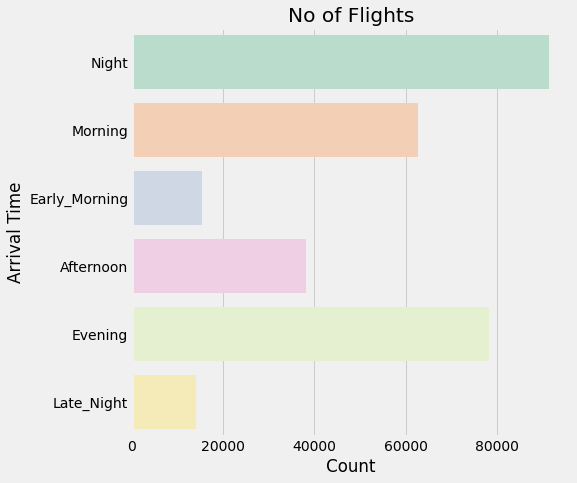

In [57]:
plt.figure(figsize=(7, 7))
sns.countplot(y="arrival_time", data=data, palette="Pastel2")
plt.title("No of Flights")
plt.xlabel("Count")
plt.ylabel("Arrival Time")

In [58]:
# as we can see that most of the flights arrived at Night

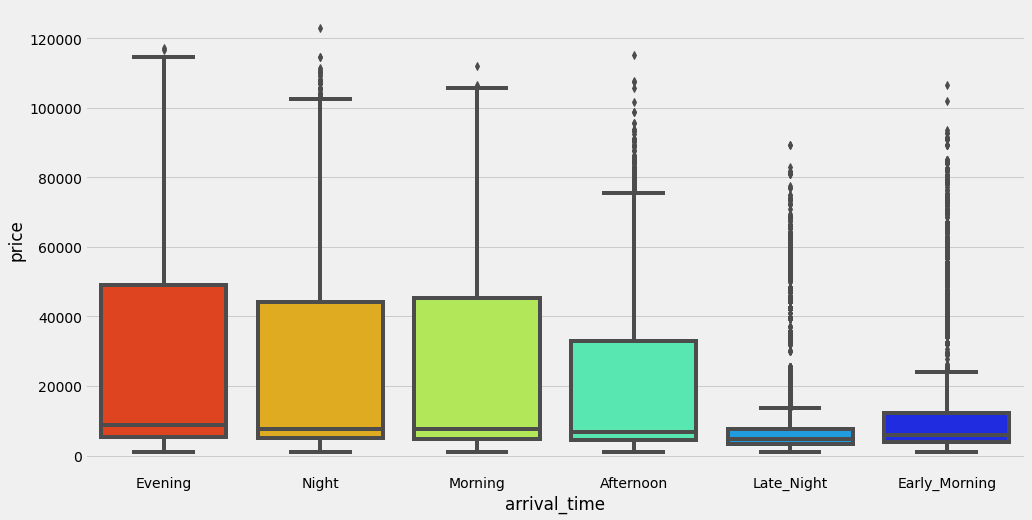

In [59]:
plt.figure(figsize=(15, 8))
sns.boxplot(x="arrival_time", y="price", data=data.sort_values('price', ascending=True), palette="jet_r")

In [60]:
# as we can see that the flights that arrived at Evening has more prices

Class vs Price

Text(0, 0.5, 'Class')

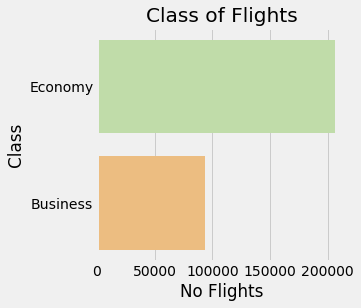

In [61]:
plt.figure(figsize=(4, 4))
sns.countplot(y="class", data=data, palette="Spectral_r")
plt.title("Class of Flights")
plt.xlabel("No Flights")
plt.ylabel("Class")

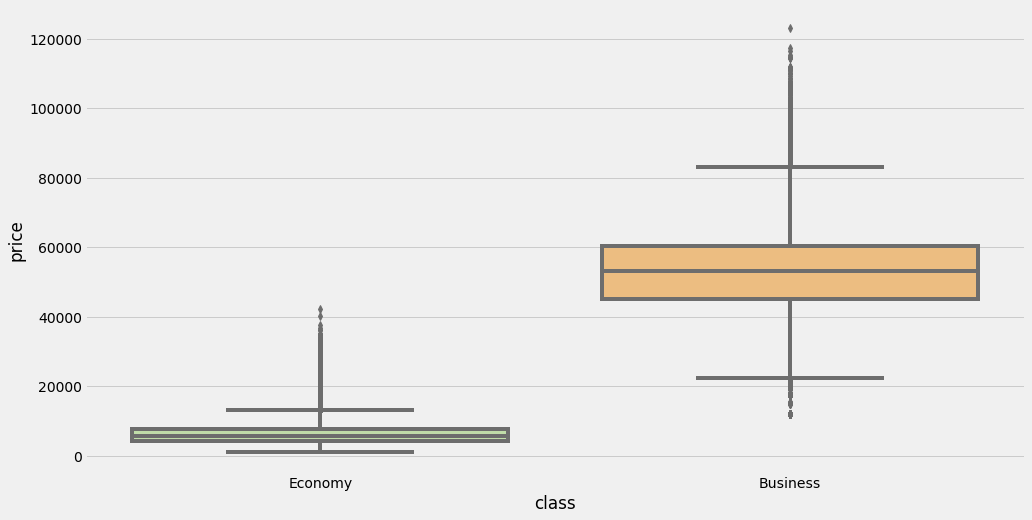

In [62]:
plt.figure(figsize=(15, 8))
sns.boxplot(x="class", y="price", data=data.sort_values('price', ascending=True), palette="Spectral_r")

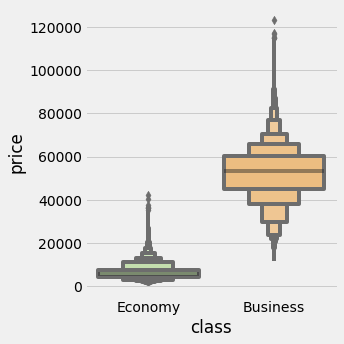

In [63]:
sns.catplot(x="class", y="price", data=data.sort_values('price', ascending=True), kind="boxen", palette="Spectral_r")

**Which is the most expensive flight?**

In [64]:
most_exp = data[data['price'] == data['price'].max()]

In [65]:
print(f"** Most Expensive flight-{most_exp['flight'].values[0]} of Airline-{most_exp['airline'].values[0]} \nhas been departed from {most_exp['source_city'].values[0]} to the {most_exp['destination_city'].values[0]} at the price {most_exp['price'].values[0]}.")

** Most Expensive flight-UK-772 of Airline-Vistara 
has been departed from Kolkata to the Delhi at the price 123071.


**Which is the cheapest flight?**

In [66]:
most_cheap = data[data['price'] == data['price'].min()]

In [67]:
print(f"** Cheap flight-{most_cheap['flight'].values[0]} of Airline-{most_cheap['airline'].values[0]} \nhas been departed from {most_cheap['source_city'].values[0]} to the {most_cheap['destination_city'].values[0]} at the price {most_cheap['price'].values[0]}.")

** Cheap flight-I5-517 of Airline-AirAsia 
has been departed from Chennai to the Hyderabad at the price 1105.


Text(0.5, 0, 'Duration')

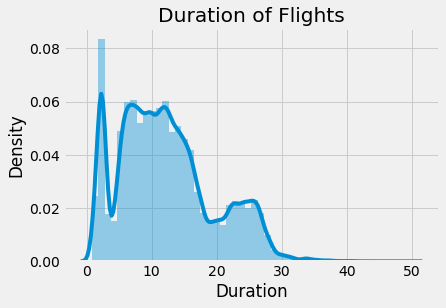

In [68]:
sns.distplot(x=data['duration'])
plt.title("Duration of Flights")
plt.xlabel("Duration")

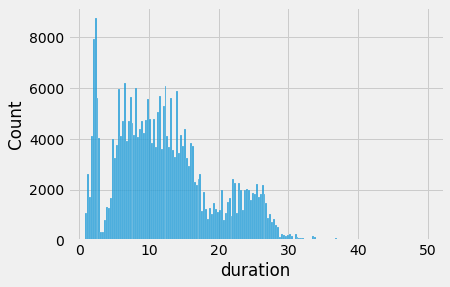

In [69]:
sns.histplot(data=data, x="duration")

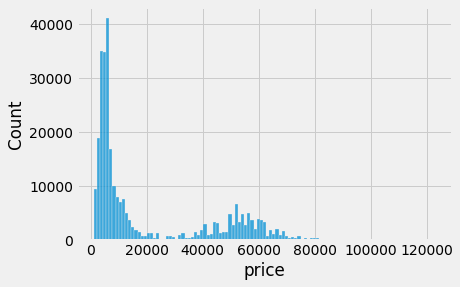

In [70]:
sns.histplot(data=data, x="price")

#Preprocessing

In [71]:
data['class'] = data['class'].apply(lambda x: 0 if x == 'Economy' else 1)

In [72]:
data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,duration_cat
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,0,2.17,1,5953,<6
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,0,2.33,1,5953,<6
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,0,2.17,1,5956,<6
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,0,2.25,1,5955,<6
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,0,2.33,1,5955,<6


In [73]:
# Airlines
airlines_dum = pd.get_dummies(data['airline'], drop_first=True)

In [74]:
airlines_dum.head()

,Air_India,GO_FIRST,Indigo,SpiceJet,Vistara
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,0,0
3,0,0,0,0,1
4,0,0,0,0,1


In [75]:
flights = pd.concat([data, airlines_dum], axis=1) #means by columns

In [76]:
flights.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,duration_cat,Air_India,GO_FIRST,Indigo,SpiceJet,Vistara
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,0,2.17,1,5953,<6,0,0,0,1,0
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,0,2.33,1,5953,<6,0,0,0,1,0
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,0,2.17,1,5956,<6,0,0,0,0,0
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,0,2.25,1,5955,<6,0,0,0,0,1
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,0,2.33,1,5955,<6,0,0,0,0,1


In [77]:
flights.drop(['duration_cat', 'airline'], inplace=True, axis=1)

In [78]:
flights.sample(1)

,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,Air_India,GO_FIRST,Indigo,SpiceJet,Vistara
263954,UK-776,Kolkata,Evening,one,Late_Night,Delhi,1,6.58,49,66063,0,0,0,0,1


In [79]:
# departure_time
depart_dum = pd.get_dummies(flights['departure_time'], drop_first=True)

In [80]:
flights = pd.concat([flights, depart_dum], axis=1)
flights.drop('departure_time', inplace=True, axis=1)
flights.sample(2)

,flight,source_city,stops,arrival_time,destination_city,class,duration,days_left,price,Air_India,GO_FIRST,Indigo,SpiceJet,Vistara,Early_Morning,Evening,Late_Night,Morning,Night
192982,AI-9894,Chennai,one,Night,Mumbai,0,12.75,42,5320,1,0,0,0,0,0,0,0,1,0
170694,UK-880,Hyderabad,one,Night,Bangalore,0,7.00,49,6461,0,0,0,0,1,0,0,0,0,0


In [81]:
flights.columns = ['flight', 'source_city', 'stops', 'arrival_time', 'destination_city',
       'class', 'duration', 'days_left', 'price', 'Air_India', 'GO_FIRST',
       'Indigo', 'SpiceJet', 'Vistara', 'dep_early_morning', 'dep_evening',
       'dep_late_night', 'dep_morning', 'dep_night']

In [82]:
flights.head()

,flight,source_city,stops,arrival_time,destination_city,class,duration,days_left,price,Air_India,GO_FIRST,Indigo,SpiceJet,Vistara,dep_early_morning,dep_evening,dep_late_night,dep_morning,dep_night
0,SG-8709,Delhi,zero,Night,Mumbai,0,2.17,1,5953,0,0,0,1,0,0,1,0,0,0
1,SG-8157,Delhi,zero,Morning,Mumbai,0,2.33,1,5953,0,0,0,1,0,1,0,0,0,0
2,I5-764,Delhi,zero,Early_Morning,Mumbai,0,2.17,1,5956,0,0,0,0,0,1,0,0,0,0
3,UK-995,Delhi,zero,Afternoon,Mumbai,0,2.25,1,5955,0,0,0,0,1,0,0,0,1,0
4,UK-963,Delhi,zero,Morning,Mumbai,0,2.33,1,5955,0,0,0,0,1,0,0,0,1,0


In [83]:
# Arrival Time
arrival_dum = pd.get_dummies(flights['arrival_time'], drop_first=True)
flights = pd.concat([flights, arrival_dum], axis=1)
flights.drop('arrival_time', inplace=True, axis=1)
flights.sample(2)

,flight,source_city,stops,destination_city,class,duration,days_left,price,Air_India,GO_FIRST,Indigo,SpiceJet,Vistara,dep_early_morning,dep_evening,dep_late_night,dep_morning,dep_night,Early_Morning,Evening,Late_Night,Morning,Night
69740,G8-341,Mumbai,one,Kolkata,0,11.17,46,5817,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0
36715,UK-943,Delhi,one,Chennai,0,12.42,12,11520,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0


In [84]:
flights.columns = ['flight', 'source_city', 'stops', 'destination_city', 'class',
       'duration', 'days_left', 'price', 'Air_India', 'GO_FIRST', 'Indigo',
       'SpiceJet', 'Vistara', 'dep_early_morning', 'dep_evening',
       'dep_late_night', 'dep_morning', 'dep_night', 'arr_early_morning',
       'arr_evening', 'arr_late_night', 'arr_morning', 'arr_night']

In [85]:
flights.head()

,flight,source_city,stops,destination_city,class,duration,days_left,price,Air_India,GO_FIRST,Indigo,SpiceJet,Vistara,dep_early_morning,dep_evening,dep_late_night,dep_morning,dep_night,arr_early_morning,arr_evening,arr_late_night,arr_morning,arr_night
0,SG-8709,Delhi,zero,Mumbai,0,2.17,1,5953,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
1,SG-8157,Delhi,zero,Mumbai,0,2.33,1,5953,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0
2,I5-764,Delhi,zero,Mumbai,0,2.17,1,5956,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
3,UK-995,Delhi,zero,Mumbai,0,2.25,1,5955,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
4,UK-963,Delhi,zero,Mumbai,0,2.33,1,5955,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0


In [86]:
# Stops
stops_dum = pd.get_dummies(flights['stops'], drop_first=True)
flights = pd.concat([flights, stops_dum], axis=1)
flights.drop('stops', inplace=True, axis=1)
flights.sample(2)

,flight,source_city,destination_city,class,duration,days_left,price,Air_India,GO_FIRST,Indigo,SpiceJet,Vistara,dep_early_morning,dep_evening,dep_late_night,dep_morning,dep_night,arr_early_morning,arr_evening,arr_late_night,arr_morning,arr_night,two_or_more,zero
101923,6E-684,Bangalore,Mumbai,0,8.00,45,3153,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0
111253,6E-6257,Bangalore,Hyderabad,0,1.17,16,1714,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1


In [87]:
# Source City
source_city_dum = pd.get_dummies(flights['source_city'], drop_first=True)
flights = pd.concat([flights, source_city_dum], axis=1)
flights.drop('source_city', inplace=True, axis=1)
flights.sample(2)

,flight,destination_city,class,duration,days_left,price,Air_India,GO_FIRST,Indigo,SpiceJet,Vistara,dep_early_morning,dep_evening,dep_late_night,dep_morning,dep_night,arr_early_morning,arr_evening,arr_late_night,arr_morning,arr_night,two_or_more,zero,Chennai,Delhi,Hyderabad,Kolkata,Mumbai
174956,UK-860,Kolkata,0,11.25,38,6485,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
298595,UK-826,Hyderabad,1,19.33,16,41064,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [88]:
flights.columns = ['flight', 'destination_city', 'class', 'duration', 'days_left', 'price',
       'Air_India', 'GO_FIRST', 'Indigo', 'SpiceJet', 'Vistara',
       'dep_early_morning', 'dep_evening', 'dep_late_night', 'dep_morning',
       'dep_night', 'arr_early_morning', 'arr_evening', 'arr_late_night',
       'arr_morning', 'arr_night', 'two_or_more', 'zero', 'sou_chennai', 'sou_delhi',
       'sou_hyderabad', 'sou_kolkata', 'sou_mumbai']

In [89]:
# Destination City
destination_city_dum = pd.get_dummies(flights['destination_city'], drop_first=True)
flights = pd.concat([flights, destination_city_dum], axis=1)
flights.drop('destination_city', inplace=True, axis=1)
flights.sample(2)

,flight,class,duration,days_left,price,Air_India,GO_FIRST,Indigo,SpiceJet,Vistara,dep_early_morning,dep_evening,dep_late_night,dep_morning,dep_night,arr_early_morning,arr_evening,arr_late_night,arr_morning,arr_night,two_or_more,zero,sou_chennai,sou_delhi,sou_hyderabad,sou_kolkata,sou_mumbai,Chennai,Delhi,Hyderabad,Kolkata,Mumbai
125303,6E-6339,0,6.08,36,7433,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
19762,UK-953,0,12.17,48,4272,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0


In [90]:
flights.columns = ['flight', 'class', 'duration', 'days_left', 'price', 'Air_India',
       'GO_FIRST', 'Indigo', 'SpiceJet', 'Vistara', 'dep_early_morning',
       'dep_evening', 'dep_late_night', 'dep_morning', 'dep_night',
       'arr_early_morning', 'arr_evening', 'arr_late_night', 'arr_morning',
       'arr_night', 'two_or_more', 'zero', 'sou_chennai', 'sou_delhi',
       'sou_hyderabad', 'sou_kolkata', 'sou_mumbai', 'des_chennai', 'des_delhi',
       'des_hyderabad', 'des_kolkata', 'des_mumbai']

In [91]:
flights.head()

,flight,class,duration,days_left,price,Air_India,GO_FIRST,Indigo,SpiceJet,Vistara,dep_early_morning,dep_evening,dep_late_night,dep_morning,dep_night,arr_early_morning,arr_evening,arr_late_night,arr_morning,arr_night,two_or_more,zero,sou_chennai,sou_delhi,sou_hyderabad,sou_kolkata,sou_mumbai,des_chennai,des_delhi,des_hyderabad,des_kolkata,des_mumbai
0,SG-8709,0,2.17,1,5953,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1
1,SG-8157,0,2.33,1,5953,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1
2,I5-764,0,2.17,1,5956,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
3,UK-995,0,2.25,1,5955,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
4,UK-963,0,2.33,1,5955,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1


In [92]:
flights.drop('flight', inplace=True, axis=1)
flights.sample(2)

,class,duration,days_left,price,Air_India,GO_FIRST,Indigo,SpiceJet,Vistara,dep_early_morning,dep_evening,dep_late_night,dep_morning,dep_night,arr_early_morning,arr_evening,arr_late_night,arr_morning,arr_night,two_or_more,zero,sou_chennai,sou_delhi,sou_hyderabad,sou_kolkata,sou_mumbai,des_chennai,des_delhi,des_hyderabad,des_kolkata,des_mumbai
46696,0,2.25,21,2339,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0
229726,1,11.92,47,41269,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0


In [93]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300153 entries, 0 to 300152
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   class              300153 non-null  int64  
 1   duration           300153 non-null  float64
 2   days_left          300153 non-null  int64  
 3   price              300153 non-null  int64  
 4   Air_India          300153 non-null  uint8  
 5   GO_FIRST           300153 non-null  uint8  
 6   Indigo             300153 non-null  uint8  
 7   SpiceJet           300153 non-null  uint8  
 8   Vistara            300153 non-null  uint8  
 9   dep_early_morning  300153 non-null  uint8  
 10  dep_evening        300153 non-null  uint8  
 11  dep_late_night     300153 non-null  uint8  
 12  dep_morning        300153 non-null  uint8  
 13  dep_night          300153 non-null  uint8  
 14  arr_early_morning  300153 non-null  uint8  
 15  arr_evening        300153 non-null  uint8  
 16  ar

In [94]:
flights.describe()

,class,duration,days_left,price,Air_India,GO_FIRST,Indigo,SpiceJet,Vistara,dep_early_morning,dep_evening,dep_late_night,dep_morning,dep_night,arr_early_morning,arr_evening,arr_late_night,arr_morning,arr_night,two_or_more,zero,sou_chennai,sou_delhi,sou_hyderabad,sou_kolkata,sou_mumbai,des_chennai,des_delhi,des_hyderabad,des_kolkata,des_mumbai
count,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000
mean,0.311464,12.221021,26.004751,20889.660523,0.269503,0.077204,0.143660,0.030021,0.425979,0.222520,0.216896,0.004351,0.237032,0.159968,0.051364,0.260944,0.046646,0.209010,0.304971,0.044264,0.119952,0.128934,0.204372,0.135951,0.154411,0.202883,0.134491,0.191103,0.142347,0.165029,0.196890
std,0.463093,7.191997,13.561004,22697.767366,0.443702,0.266915,0.350745,0.170646,0.494491,0.415939,0.412132,0.065819,0.425263,0.366577,0.220739,0.439150,0.210880,0.406602,0.460396,0.205682,0.324906,0.335128,0.403243,0.342737,0.361343,0.402147,0.341180,0.393170,0.349407,0.371207,0.397649
min,0.000000,0.830000,1.000000,1105.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,6.830000,15.000000,4783.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,11.250000,26.000000,7425.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,16.170000,38.000000,42521.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,49.830000,49.000000,123071.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [95]:
corr = flights.corr()

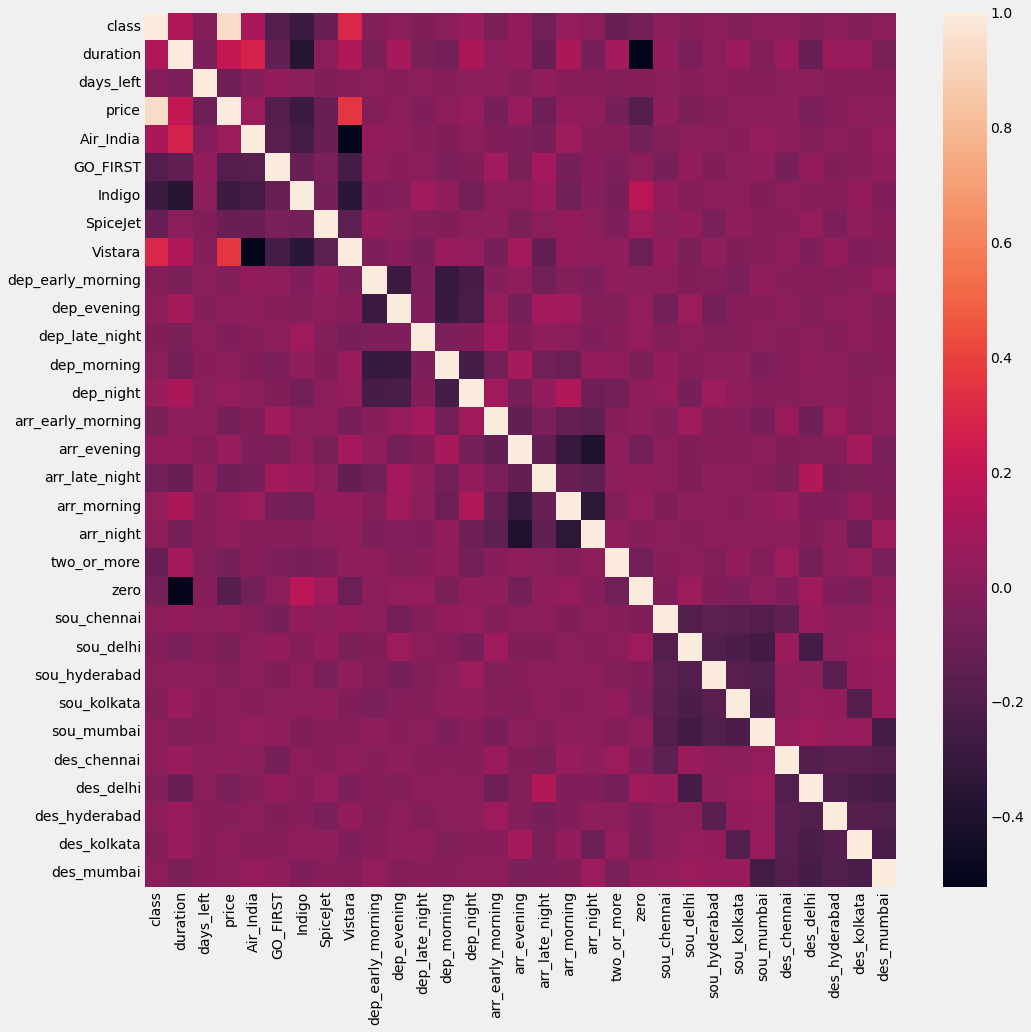

In [96]:
plt.figure(figsize=(15, 15))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

In [97]:
flights_section_one = flights[['class', 'duration']]

In [98]:
flights_section_two = flights.drop(['class', 'duration'], axis=1)

In [99]:
flights_section_two = flights_section_two.astype(np.int64)

In [100]:
flights_section_two.head()

,days_left,price,Air_India,GO_FIRST,Indigo,SpiceJet,Vistara,dep_early_morning,dep_evening,dep_late_night,dep_morning,dep_night,arr_early_morning,arr_evening,arr_late_night,arr_morning,arr_night,two_or_more,zero,sou_chennai,sou_delhi,sou_hyderabad,sou_kolkata,sou_mumbai,des_chennai,des_delhi,des_hyderabad,des_kolkata,des_mumbai
0,1,5953,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1
1,1,5953,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1
2,1,5956,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
3,1,5955,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
4,1,5955,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1


In [101]:
flights_df = pd.concat([flights_section_one, flights_section_two], axis = 1)

In [102]:
flights_df.head()

,class,duration,days_left,price,Air_India,GO_FIRST,Indigo,SpiceJet,Vistara,dep_early_morning,dep_evening,dep_late_night,dep_morning,dep_night,arr_early_morning,arr_evening,arr_late_night,arr_morning,arr_night,two_or_more,zero,sou_chennai,sou_delhi,sou_hyderabad,sou_kolkata,sou_mumbai,des_chennai,des_delhi,des_hyderabad,des_kolkata,des_mumbai
0,0,2.17,1,5953,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1
1,0,2.33,1,5953,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1
2,0,2.17,1,5956,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
3,0,2.25,1,5955,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
4,0,2.33,1,5955,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1


In [103]:
x = flights_df.drop('price', axis=1)
y = flights_df['price']

In [104]:
x, y = x.values, y.values

In [105]:
x.shape

(300153, 30)

In [106]:
y.shape

(300153,)

In [107]:
from sklearn.utils import shuffle
x, y = shuffle(x, y)

In [108]:
X = np.array(y).astype('float32')
y = np.array(y).astype('float32')

In [109]:
y

array([89729.,  5859.,  3671., ...,  6067.,  5177., 42412.], dtype=float32)

In [110]:
y = y.reshape(-1,1)

In [111]:
y

array([[89729.],
       [ 5859.],
       [ 3671.],
       ...,
       [ 6067.],
       [ 5177.],
       [42412.]], dtype=float32)

#Model

In [112]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

In [113]:
#scaling the data before running the model
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(x_train)
X_test = scaler_x.transform(x_test)

scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)

In [114]:
x_train.shape

(240122, 30)

In [115]:
x_test.shape

(60031, 30)

In [116]:
y_train.shape

(240122, 1)

#Using DL

In [117]:
import tensorflow as tf

In [118]:
x_train.shape[1]

30

In [119]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(units=256, activation="relu", input_dim=x_train.shape[1]))
model.add(tf.keras.layers.Dropout(rate=0.2))

model.add(tf.keras.layers.Dense(units=128, activation="relu"))
model.add(tf.keras.layers.Dropout(rate=0.2))

model.add(tf.keras.layers.Dense(units=32, activation="relu"))
model.add(tf.keras.layers.Dense(units=1, activation="linear"))

In [120]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               7936      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 44,993
Trainable params: 44,993
Non-traina

In [121]:
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=1e-3),
    loss='mean_absolute_error')

In [122]:
model.fit(x=x_train, y=y_train, 
	validation_data=(x_test, y_test),
	epochs=100, batch_size=256)

Epoch 1/100
938/938 [==============================] - 6s 4ms/step - loss: 0.2779 - val_loss: 0.1496
Epoch 2/100
938/938 [==============================] - 4s 4ms/step - loss: 0.1418 - val_loss: 0.1329
Epoch 3/100
938/938 [==============================] - 4s 4ms/step - loss: 0.1281 - val_loss: 0.1213
Epoch 4/100
938/938 [==============================] - 4s 4ms/step - loss: 0.1196 - val_loss: 0.1117
Epoch 5/100
938/938 [==============================] - 4s 4ms/step - loss: 0.1138 - val_loss: 0.1109
Epoch 6/100
938/938 [==============================] - 4s 4ms/step - loss: 0.1096 - val_loss: 0.1011
Epoch 7/100
938/938 [==============================] - 4s 4ms/step - loss: 0.1066 - val_loss: 0.0988
Epoch 8/100
938/938 [==============================] - 4s 4ms/step - loss: 0.1043 - val_loss: 0.0992
Epoch 9/100
938/938 [==============================] - 5s 5ms/step - loss: 0.1023 - val_loss: 0.0972
Epoch 10/100
938/938 [==============================] - 4s 5ms/step - loss: 0.1004 - val_lo

In [123]:
model.evaluate(x_test, y_test)

1876/1876 [==============================] - 5s 3ms/step - loss: 0.0787


0.07872128486633301

In [140]:
pred = model.predict(x_test)

In [141]:
y_predict_dl = scaler_y.inverse_transform(pred)
y_test_dl = scaler_y.inverse_transform(y_test)

In [146]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_dl, y_predict_dl)),'.3f'))
MSE = mean_squared_error(y_test_dl, y_predict_dl)
r2 = r2_score(y_test_dl, y_predict_dl)

In [147]:
print('RMSE =',RMSE, '\nMSE =',MSE, '\nR2 =', round(r2,4)) 

RMSE = 3957.754 
MSE = 15663820.0 
R2 = 0.9696


In [148]:
predict_df_dl = pd.DataFrame(y_predict_dl)
test_df_dl = pd.DataFrame(y_test_dl)

compared_dl = pd.concat([test_df_dl, predict_df_dl], axis = 1)
compared_dl.sample(7)

,0,0
19403,7017.000000,2810.684814
4371,2835.999268,3005.596924
13396,7959.000977,6599.541016
276,7141.000000,6598.994141
36542,60365.000000,53679.261719
54013,55377.000000,54690.359375
39158,6032.000977,5960.166992


In [149]:
compared_dl.columns = ['test','predict']

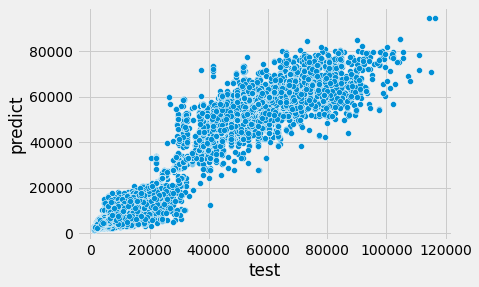

In [150]:
sns.scatterplot(data= compared_dl, x="test", y="predict")

**Using ML (Alghos)**

Linear Regression

In [134]:
# using linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

regresssion_model_sklearn = LinearRegression()
regresssion_model_sklearn.fit(x_train, y_train)

LinearRegression()

In [136]:
regresssion_model_sklearn_accuracy = regresssion_model_sklearn.score(x_test, y_test)
round(regresssion_model_sklearn_accuracy,4)

0.9116

In [137]:
y_predict = regresssion_model_sklearn.predict(x_test)

In [138]:
y_predict_orig = scaler_y.inverse_transform(y_predict)
y_test_orig = scaler_y.inverse_transform(y_test)

In [144]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)

In [145]:
print('RMSE =',RMSE, '\nMSE =',MSE, '\nR2 =', round(r2,4)) 

RMSE = 6751.498 
MSE = 45582729.05805387 
R2 = 0.9116


XGBoost

In [152]:
import xgboost as xgb

In [153]:
model = xgb.XGBRegressor(objective = 'reg:squarederror', learning_rate = 0.1, max_depth = 8, n_estimators = 50)
model.fit(x_train, y_train)

XGBRegressor(max_depth=8, n_estimators=50, objective='reg:squarederror')

In [154]:
result = model.score(x_test, y_test)
print("Accuracy  {}".format(result))

Accuracy  0.9710472928890603


In [156]:
y_predict = model.predict(x_test)

In [159]:
y_predict = y_predict.reshape(-1, 1)

In [160]:
y_predict_orig = scaler_y.inverse_transform(y_predict)
y_test_orig = scaler_y.inverse_transform(y_test)

In [162]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nR2 =', round(r2,4)) 

RMSE = 3864.882 
MSE = 14937311.0 
R2 = 0.971


In [163]:
predict_df = pd.DataFrame(y_predict_orig)
test_df = pd.DataFrame(y_test_orig)

compared = pd.concat([test_df, predict_df], axis = 1)
compared.sample(7)

,0,0
32125,22140.000000,27106.353516
39002,4941.999023,5239.378906
42458,12990.000000,11516.334961
22963,5413.000000,2987.395752
28637,5345.000000,5196.243164
1381,63226.000000,55370.742188
54135,5934.000000,6198.202148


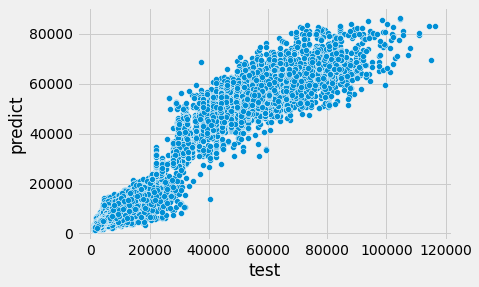

In [165]:
compared.columns = ["test", "predict"]
sns.scatterplot(data= compared, x="test", y="predict")

**Implemented By Muhammad Hanan Asghar**